In [1]:
import cv2
import numpy as np
path = '4.png'
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 15)

In [2]:
def mblur(img, k):
    return cv2.medianBlur(img, k)

def blur(img, k):
    return cv2.GaussianBlur(img,(k,k),cv2.BORDER_DEFAULT)
def thresh(img, t1, t2):
    ret,t = cv2.threshold(img,t1,t2,cv2.THRESH_BINARY_INV)
    return t

def open(img, k = 3):
    kernel = np.ones((k,k),np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

def athresh(img):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,15,15)

def dilate(img, k):
    kernel = np.ones((k,k),np.uint8)
    return cv2.erode(img,kernel,iterations = 1)

def approach1(img):
    return thresh(img, 120, 255)

def approach2(img):
    return mblur(thresh(img, 120, 255))

def custom(img):
    ans = img[:]
    for i in range(img.shape[0]-5):
        for j in range(img.shape[1]-5):
            sub = img[i:i+5, j:j+5][:]
            if len(sub[sub == 255]) <=2:
                ans[i][j] = 0
    return ans

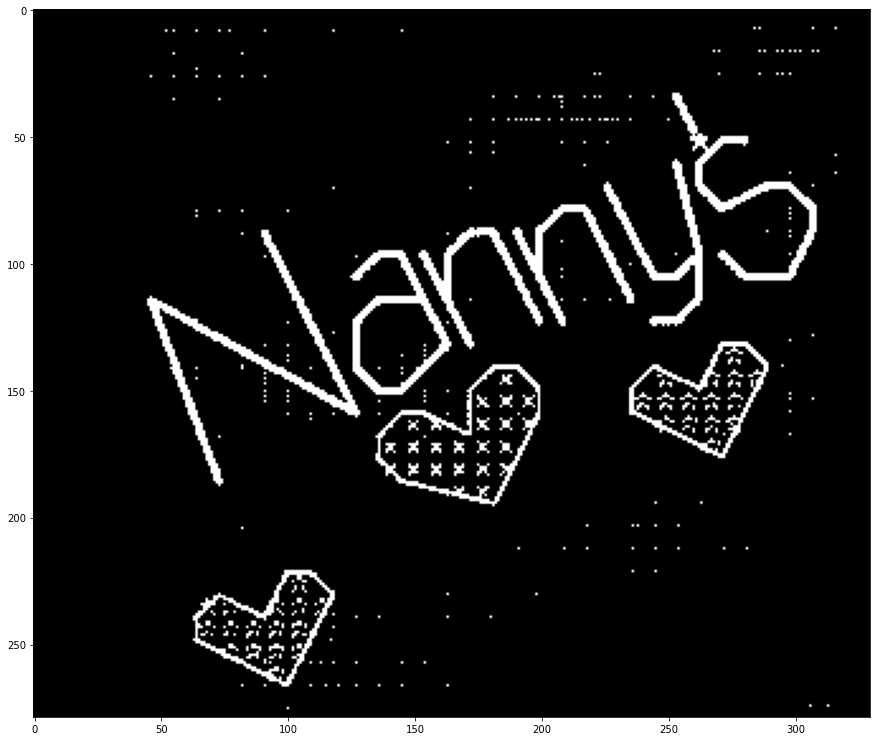

In [3]:
img = cv2.imread(path, 0)

a = img[:]

a = approach1(a)

#a = thresh(a, 120, 255)
#a = mblur(a, 3)

b = cv2.bitwise_and(a, img)
plt.imshow(a, cmap = 'gray')

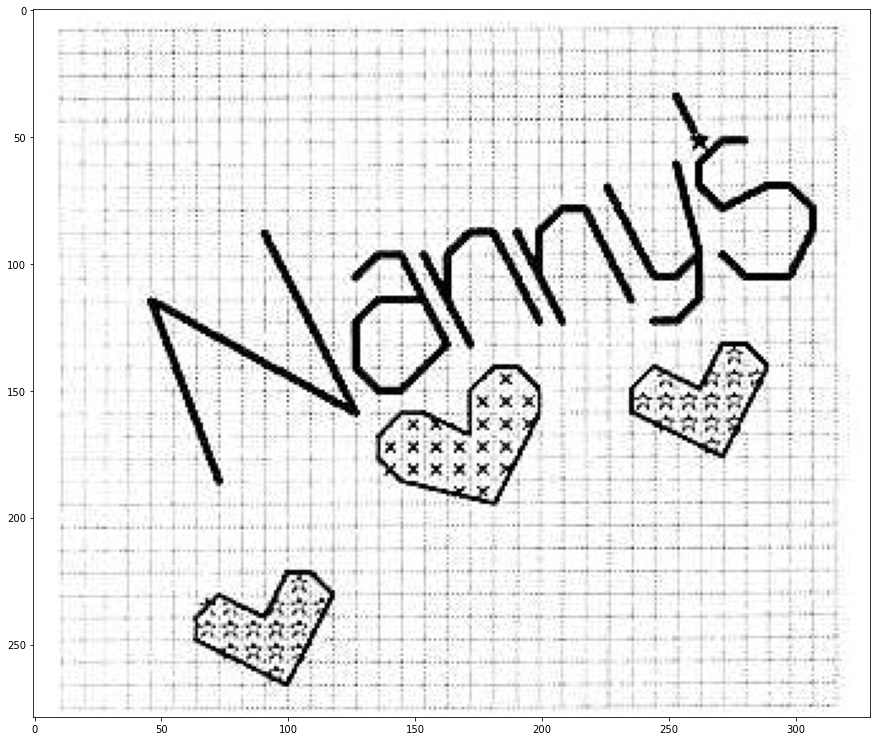

In [4]:
plt.imshow(img, cmap = 'gray')

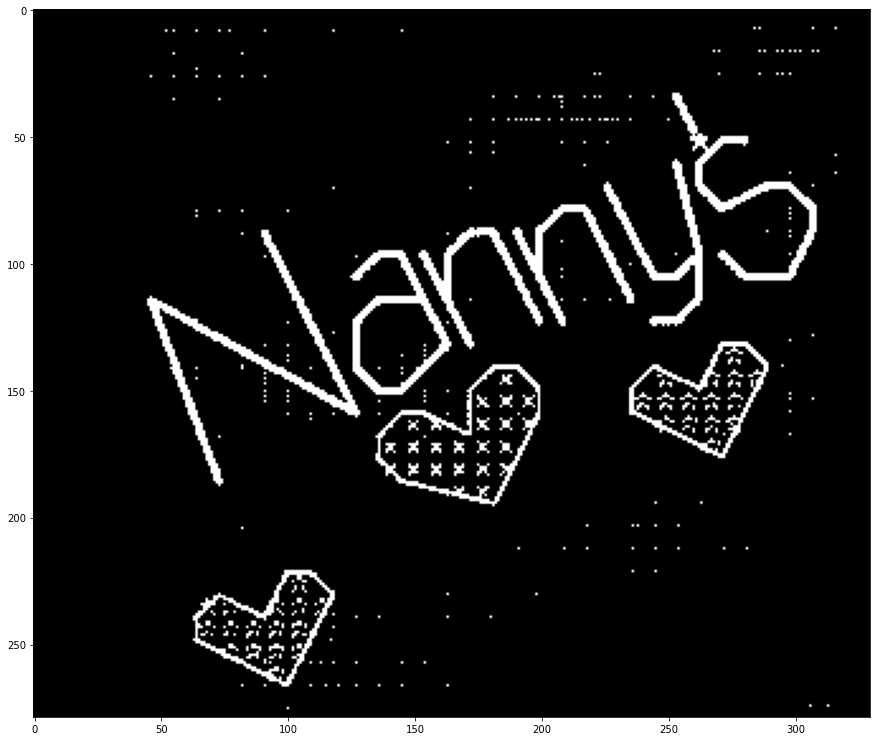

In [5]:
plt.imshow(a, cmap = 'gray')

True

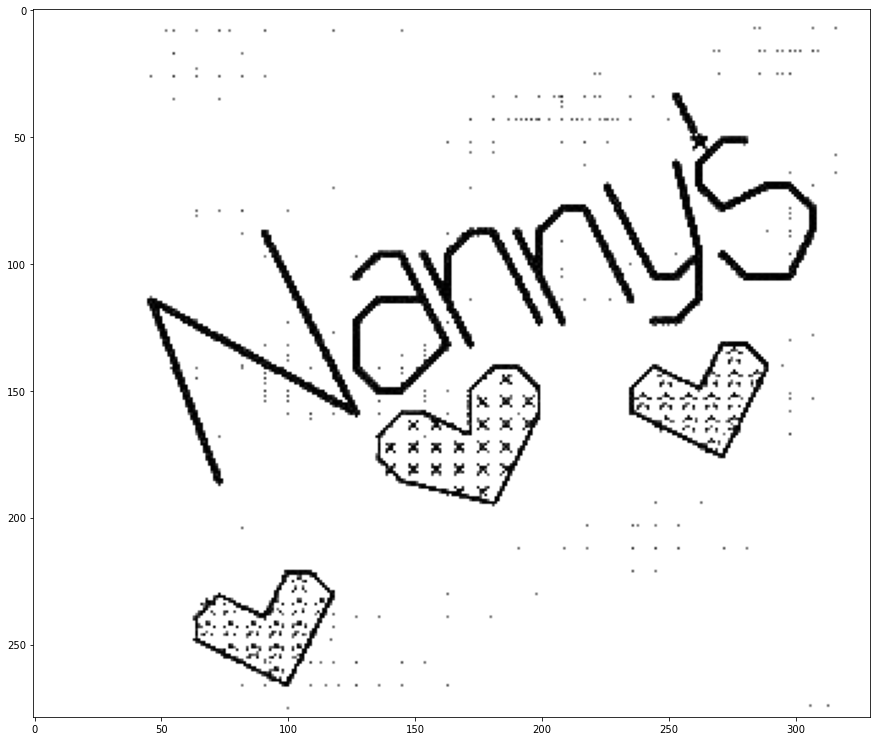

In [6]:
b[a<190] = 255
plt.imshow(b, cmap = 'gray')
cv2.imwrite('result.png', b)